# Homework 2 (HW2)

By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in Python;
- Carry out simple multivariate regression analyses;
- Use techniques to control for covariates;
- Conduct an observational study and reason about its results.

---

## Important Dates

- Homework release: Fri 18 Nov 2022
- **Homework due**: Fri 02 Dec 2022, 23:59
- Grade release: Mon 12 Dec 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
import scipy.stats.mstats  as mstats


## Context

Congratulations! You have just been hired as a data scientist at [FC Tokyo, a J1 League Japanese professional football club based in Chōfu, Tokyo](https://en.wikipedia.org/wiki/FC_Tokyo). The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

Your manager, Mr. Naoki Ogane, has noticed that an unusually high number of players in your team have birthdays in either April or May, so he asked you to investigate this further -- is this just a coincidence, or are players born in April or May simply better?

## Data

To answer Mr. Ogane's questions, you will use data from Wikipedia biographies. This is a subset of the Pantheon dataset (1). For tasks 1 to 4, you will use the file `japanese_athletes.csv.gz`. For task 5, you will use the file `all_entities.csv.gz`. Both datasets are`.csv` files with the same columns:

- `id`: a unique identifier per individual.
- `name`: name of the individual.
- `occupation`: the occupation of the individual (for `japanese_athletes.csv.gz`, these are all sports-related).
- `gender`: gender of the athlete.
- `alive`: flag indicating if the athlete was alive in 2020 when the dataset was collected.
- `bplace_country`: the country where the athlete was born  (for `japanese_athletes.csv.gz`, the value here is always 'Japan').
- `birthdate`: the date when the athlete was born.
- `birthyear`: the year when the athlete was born.
- `pageviews`: number of pageviews received by the athlete's page across Wikipedia language editions.

(1) Yu, A. Z., et al. (2016). Pantheon 1.0, a manually verified dataset of globally famous biographies. Scientific Data 2:150075. doi: 10.1038/sdata.2015.75

## Task 1 — 20 pts

As a good data scientist, you first load the data and perform some small sanity checks on it.

**1.1** Load the dataset containing data about Japanese athletes into memory using pandas. First, load the data directly from the compressed file. Then, print the first few lines of the dataset.

**1.2** Find the different occupations in the data and how many individuals belong to each occupation.

**1.3** Calculate the percentage of individuals who remain alive in the data.

**1.4** Plot the distribution of birth years in the dataset. In other words, what fraction of individuals are born each year? (Note that the data contains individuals born only after the year 1900).

**1.5** Plot the empirical cumulative distribution function (CDF) to visualize the distribution of pageviews. Here you should use a linear scale for both the x-axis and the y-axis.

**1.6** **Discuss:** why is it hard to visualize the distribution in the above ECDF plot?

**1.7** Re-do the above CDF plot using a log scale for both the x-axis and the y-axis. Additionally, plot vertical lines that indicate the distribution's arithmetic and geometric means.

**1.8** **Discuss:** Visually, does it look like the distribution is a power law?

**1.9** Estimate the 95% confidence intervals of the geometric mean and the arithmetic mean of pageviews using bootstrap resampling.

**1.10** **Discuss:** What advantages does the geometric mean have over the arithmetic mean to summarize the distribution?

In [2]:
# 1.1
df = pd.read_csv("./data/japanese_athletes.csv.gz", sep=",", parse_dates=["birthdate"])
df.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,25864486,Hisataka Okamoto,SOCCER PLAYER,M,True,Japan,1933-12-14,1933.0,455.0
1,1682054,Kunishige Kamamoto,SOCCER PLAYER,M,True,Japan,1944-04-15,1944.0,57847.0
2,20639249,Akira Kitaguchi,SOCCER PLAYER,M,True,Japan,1935-03-08,1935.0,759.0
3,20641463,Tsukasa Hosaka,SOCCER PLAYER,M,False,Japan,1937-03-03,1937.0,1672.0
4,25864343,Takashi Kasahara,SOCCER PLAYER,M,True,Japan,1918-03-26,1918.0,541.0


In [3]:
# 1.2
Counter(df.occupation)

Counter({'SOCCER PLAYER': 3929,
         'WRESTLER': 60,
         'ATHLETE': 40,
         'GYMNAST': 15,
         'SKIER': 11,
         'SWIMMER': 21,
         'SKATER': 21,
         'CYCLIST': 4,
         'TENNIS PLAYER': 18,
         'BASKETBALL PLAYER': 2,
         'BOXER': 2})

In [4]:
# 1.3
df.alive.mean()

0.9718651467378123

Text(0.5, 1.0, 'ECDF Plot of birthyears')

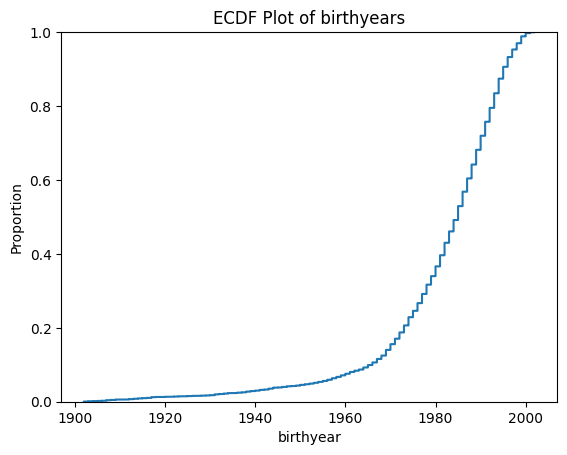

In [5]:
# 1.4 

sns.ecdfplot(df.birthyear)
plt.title("ECDF Plot of birthyears")

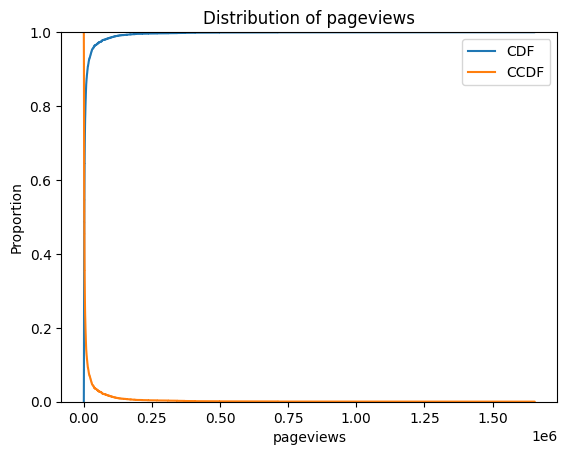

In [6]:
# 1.5
plt.title("Distribution of pageviews")
sns.ecdfplot(df.pageviews, label="CDF")
sns.ecdfplot(df.pageviews, complementary=True, label="CCDF")
plt.legend()

**1.6**: it is hard to visualize the distribution in the plot above because it is very heavy-tailed, in other words, a very small fraction of the Wikipedia pages has a disproportionally large number of pageviews. 

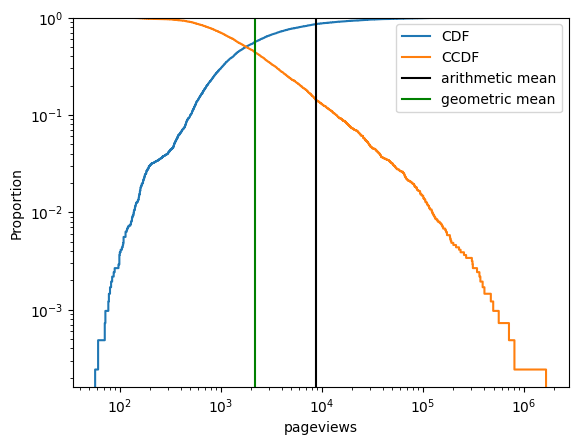

In [7]:
# 1.7
import scipy.stats.mstats  as mstats
sns.ecdfplot(df.pageviews, label="CDF")
sns.ecdfplot(df.pageviews, complementary=True, label="CCDF")
plt.xscale("log")
plt.yscale("log")
plt.axvline(df.pageviews.mean(), color="black", label="arithmetic mean")
plt.axvline(mstats.gmean(df.pageviews.values), color="green", label="geometric mean")
plt.legend()

**1.8**: No, a power law distribution should be a straight line in the *log-log* plot, while the observed distribution is curved.

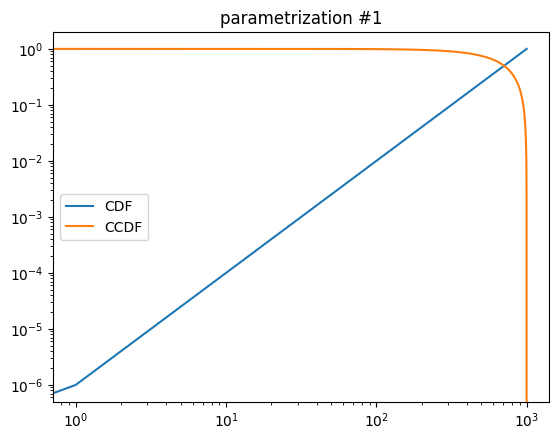

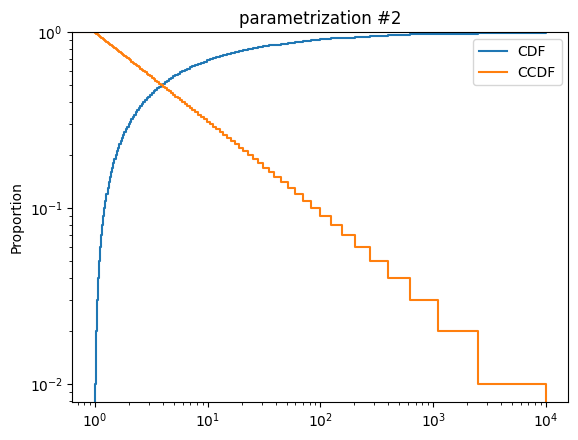

In [8]:
# Comment about 1.8: I wrongly said Friday that a power-law distribution was a line in both CDF and CCDF plots.
# This is not exactly true, as it depends on the parametrization you use.
# We gave full marks to everyone, but see the explanation below.

# if we use the parametrization
# f(x, a) = a x^{a-1}
# 0 <= x <=1 and a > 0
# the power law is only a line in the CDF not the CCDF

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

x = stats.powerlaw.cdf(np.linspace(0,1,1000), 2)
plt.xscale("log")
plt.yscale("log")
plt.plot(x, label="CDF")
plt.plot(1-x, label="CCDF")
plt.title("parametrization #1")
plt.legend()
plt.show()


# if we use the parametrization
# f(x, a, b) = b x^{-a}
# a > 0, b > 0
# the power law is only a line in the CCDF not the CDF

x = np.linspace(1, 100,100)
x = 10000 * x ** -2 

plt.xscale("log")
plt.yscale("log")
sns.ecdfplot(x, complementary=False, label="CDF")
sns.ecdfplot(x, complementary=True, label="CCDF")
plt.title("parametrization #2")
plt.legend()
plt.show()

In [9]:
# 1.9 

import scipy.stats as stats

amean = stats.bootstrap((df.pageviews.values,), statistic=np.mean)
gmean = stats.bootstrap((df.pageviews.values,), statistic=mstats.gmean)

print("Arith. mean 95%CI:", amean.confidence_interval.low, amean.confidence_interval.high )
print("Geom. mean  95%CI:",  gmean.confidence_interval.low, gmean.confidence_interval.high )

Arith. mean 95%CI: 7656.992414628562 10300.547456241913
Geom. mean  95%CI: 2095.9332861653324 2282.1487945301214


**1.10** The geometric mean is a robust statistic, thus it captures the central tendency of the data giving less importance to outliers.

## Task 2 — 20 pts

Next, investigate the question posed by Mr. Ogane. *Why do so many Tokyo FC players have birthdays in the same month?* 
Here you will not look specifically at Tokyo FC players, but more generally at the birthdays of the athletes in the dataset you have explored in Task 1

**2.1** Calculate and plot the distribution of births (among the athletes contained in the Wikipedia dataset) over months, i.e., what percentage of births happen in January, February, etc.

**2.2** Puzzled with the results, you use census data to retrieve the percentage of births happening each month (this is given to you in an array below). Plot this distribution.

**2.3** **Discuss:** what is different between the distributions you ploted in **2.1** and **2.2**

After discussing with your colleagues at work, a theory comes to your mind: school in Japan starts in April. Children who were born between April 1 and March 31 of the following year are placed within the same grade. Therefore, you suspect that the observed pattern may have something to do with when students start school.

**2.4** Considering that students in Japanese schools have the same birth distribution over the months of the year as the overall Japanese population, i.e., the `birth_per_month` array that was provided to you, calculate:

- For students born in April, how many months older are they than the average student in their grade?
- For students born in March, how many months younger are they than the average student in their grade?

**2.5** **Discuss:** Considering your common sense and the results obtained from the simulation: what advantage do students born in April have over those born in March? How may this affect their odds of becoming professional athletes?

In [10]:
birth_per_month = np.array([
0.08118368,0.08148065, 0.08182577, 0.07982728, 0.08301363,
0.08422556, 0.08518067, 0.08925791, 0.08635247, 0.08460279,
0.08258825, 0.08046134
])

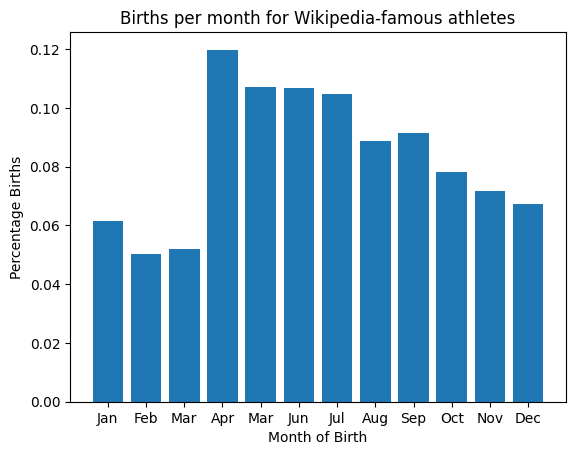

In [11]:
# 2.1

df["birthdate"] = pd.to_datetime(df["birthdate"])

# Creates a helper column
df["month_of_birth"] = df["birthdate"].dt.month

# Calculates the percentage of athletes born per month
tmp = df.groupby("month_of_birth").name.count()
tmp = tmp / tmp.sum()


plt.bar(tmp.index, tmp.values)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12],
           ["Jan", "Feb", "Mar", "Apr", "Mar", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Births per month for Wikipedia-famous athletes")
plt.ylabel("Percentage Births")
plt.xlabel("Month of Birth");

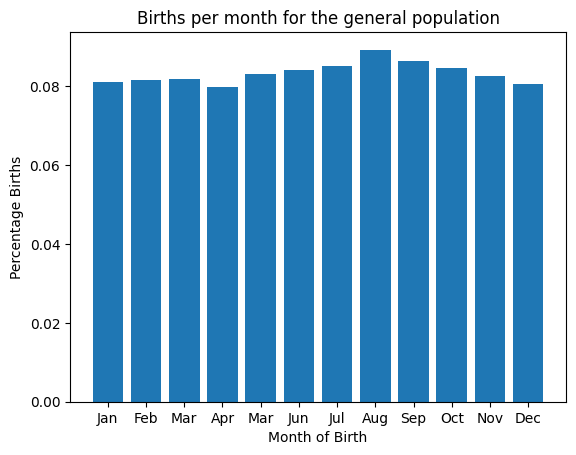

In [12]:
# 2.2

# plots the distribution for the general population
plt.bar(list(range(1, 13, 1)), birth_per_month)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12],
           ["Jan", "Feb", "Mar", "Apr", "Mar", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Births per month for the general population")
plt.ylabel("Percentage Births")
plt.xlabel("Month of Birth");

**2.3** While the percentage of births per month remains relatively stable for the overall population, around 8%, for the athletes, we see a sudden discontinuity between March and April. Following the said discontinuity, the percentage of births per months decline.

In [13]:
# 2.4

def average_older(x):
    diff = x - 4
    diff[x < 4] = diff[x < 4] + 12 # Jan-Mar would be negative
    return np.mean(diff, axis=0)

def average_younger(x):
    diff = 12 - x + 3
    diff[x < 4] = 3 - x[x < 4] 
    return np.mean(diff, axis=0)

# Generate a random sample class
months = np.random.choice(np.arange(1, 13), size = 10000, p = birth_per_month)

s1 = "For students born in April, how many months older are they than the average student in their grade?"
s2 = "For students born in March, how many months younger are they than the average student in their grade?"

print(s1, average_older(months), "months")
print(s2, average_younger(months), "months")


For students born in April, how many months older are they than the average student in their grade? 5.4898 months
For students born in March, how many months younger are they than the average student in their grade? 5.5102 months


**2.5** Students born in April would be significantly older than the average students in their grade, thus, they may be faster, stronger, and better players simply because they are more advanced in their  biological and psychological maturation. These students will be more likely to be selected to sports teams and grow fond of sports early on, becoming more likely to become sucessful (and thus be on wikipedia).

## Task 3 — 20 pts

You report your findings to Mr. Ogane, who receives them with great interest. He asks you: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* (Here, “Wikipedia-famous” refers to those individuals notable enough to have made it into English Wikipedia.)

**3.1** Create a new column in the dataframe called `date_diff` representing the distance between the athlete's birthdate and the cutoff date of his school class. 
- For individuals born in April, May, June, July, August, and September: The distance should be positive and represent the number of days between the birthdate and the previous April 1. For example, if someone is born on April 1, the distance is 0, if someone is born on April 10, the distance is 9, etc.
- For individuals born in October, November, December, January, February, and March: The distance should be negative and represent the number of days between the following April 1 and the birthdate. For example, if someone is born on March 31, the distance is -1; if someone is born on March 27, the distance is -5.
- Print the `date_diff` for the athletes with ids:  `20639249` and `58982155`.

**3.2** Create three numpy arrays `x`, `y`, and `ind` all of size 360. 
- `x` should contain the integers between -180 and 179 (-180 and 179 inclusive). 
- `y` should contain the percentage of athletes born with a `date_diff` equal to the corresponding value of `x`.
- `ind` should contain 0 if `x` is smaller than zero and 1 if `x` is bigger or equal to zero.


**3.3** Estimate the following linear regression: `y ~ x + ind` using `statsmodels`. Report the summary of the model.

**3.4** **Discuss:** What does the coefficient associated with the dummy variable `ind` captures in the above regression?

**3.5** Use the model parameters to estimate the percentage of athletes born on March 31st, i.e., use the intercept ($\beta_0$) and the coefficient associated with `x` ($\beta_1$) and calculate: $\beta_0 - 1 * \beta_1$ (recall that $x$ equals -1 in March 31st).

**3.6** Use the model parameters to estimate the percentage of athletes born on April 1st.

**3.7** **Discuss:** Drawing from your knowledge of observational studies and the questions answered thus far, respond to Mr. Ogane's question: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* Explain whether the evidence you have obtained is convincing and why.

---

**Comment**: Note that in **3.2**, the size of the array created is slightly smaller than the number of days in the year. This is for simplicity's sake.

In [14]:
# 3.1

df["date_diff"] = None
mask1 = df.month_of_birth.isin([1,2,3,4,5,6,7,8,9])
case1 = df[mask1].birthdate
tmp = case1.dt.year.apply(lambda x: pd.to_datetime("1st of April " + str(x) ))
case1 = (case1 - tmp).dt.days
df.loc[mask1, "date_diff"] = case1

mask2 = df.month_of_birth.isin([10, 11, 12])
case2 = df[mask2].birthdate
tmp = case2.dt.year.apply(lambda x: pd.to_datetime("1st of April " + str(x + 1) ))
case2 = (case2 - tmp).dt.days
df.loc[mask2, "date_diff"] = case2
display(df.head())

display(df[df.id == 20639249])
display(df[df.id == 58982155])

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,month_of_birth,date_diff
0,25864486,Hisataka Okamoto,SOCCER PLAYER,M,True,Japan,1933-12-14,1933.0,455.0,12,-108
1,1682054,Kunishige Kamamoto,SOCCER PLAYER,M,True,Japan,1944-04-15,1944.0,57847.0,4,14
2,20639249,Akira Kitaguchi,SOCCER PLAYER,M,True,Japan,1935-03-08,1935.0,759.0,3,-24
3,20641463,Tsukasa Hosaka,SOCCER PLAYER,M,False,Japan,1937-03-03,1937.0,1672.0,3,-29
4,25864343,Takashi Kasahara,SOCCER PLAYER,M,True,Japan,1918-03-26,1918.0,541.0,3,-6


,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,month_of_birth,date_diff
2,20639249,Akira Kitaguchi,SOCCER PLAYER,M,True,Japan,1935-03-08,1935.0,759.0,3,-24


,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,month_of_birth,date_diff
4120,58982155,Shosei Okamoto,SOCCER PLAYER,M,True,Japan,2000-04-07,2000.0,2354.0,4,6


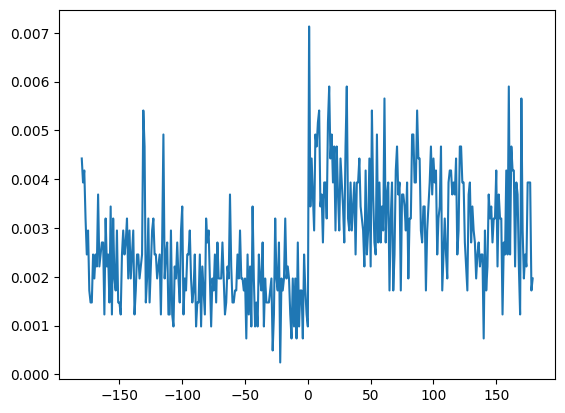

In [15]:
# 3.2

x = np.array(list(range(-180, 180, 1)))
y = []
ind = []
for x_ in x:
    y.append((df["date_diff"] == x_).sum())
    ind.append(int(x_>=0))
y = np.array(y)
ind = np.array(ind)
y = y  / y.sum()

df_ = pd.DataFrame({"x": x, "y": y, "ind": ind})
plt.plot(x, y)

In [16]:
# 3.3
import statsmodels.formula.api as smf

res = smf.ols("y~x + C(ind)", data=df_).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     118.8
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.87e-40
Time:                        16:27:49   Log-Likelihood:                 2014.3
No. Observations:                 360   AIC:                            -4023.
Df Residuals:                     357   BIC:                            -4011.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0016      0.000     14.696      0.000       0.001       0.002
C(ind)[T.1]     0.0024      0.000     12.669      0.000       0.002       0.003
x           -6.029e-06   9.16e-07     -6.583      0.000   -7.83e-06   -4.23e-06
==============================================================================
Omnibus:                       14.741   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.681
Skew:                           0.388   Prob(JB):                     0.000145
Kurtosis:                       3.760   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.4** The coefficient associated with the dummy variable `ind` captures the discontinuity between March and April. More precisely, it captures the difference between students born in March and in April that is not captured by the linear trend (`x`).

**3.5** 0.0016 + 6.029e-06 = 0.1606029%

**3.6** 0.0016 + 0.0024 = 0.4%

**3.7** Yes, we can say that there is a causal effect. Whether individuals are born on the 31st of March or on the 1st of April happens entirely by chance. Thus, it is as if we assign treatment at random to these individuals close to the cutoff date; half of them join older peers in school, and half go on to join younger peers. Since the half that joined younger peers systematically become athletes prominent enough to have a page on Wikipedia, we can say there is a causal effect.

**BONUS:** One thing that could threaten this causal conclusion is if people knowingly "cheated" the system, i.e., if parents somehow managed to lie about the date when their children were born to make them fall before or after the threshold. There could be a specific type of parent that did this (e.g., parents that knew about the advantages of being older relative to your peers as an athlete), and thus these other traits of the parents could become a confounder. One thing that suggests that this does not happen is that more people, in general, are born in March than in April.

## Task 4 — 20 pts

You return to Mr. Ogane with your findings, which he again receives with great interest. The sharp manager, however, asks a question that ignites your curiosity: *are athletes that are born right after the school cut-off date (i.e., in April or May) simply better?**

To understand if that is the case, you come up with a plan: the number of pageviews received by a Wikipedia page is a good way to differentiate between mildly famous athletes and truly famous ones. Thus you can do a matched analysis comparing athletes born in February or March (right before the cut-off) with athletes born in April or May (right after the cut-off); you should discard all athletes that were not born in one of these four months.

To make matched athletes even more comparable, you will also only consider pairs of athletes that:
1. were born in the same year; 
2. have the same gender; and
3. have the same occupation.

Matching should be done 1-to-1; i.e., each athlete born in February/March should be matched to one and only one athlete born in April/May (there will naturally be some athletes left unmatched).

**4.1** Obtain the matched data described in the text above. Report the number of matched pairs and the number of discarded athletes. Your resulting dataframe should contain one row per athlete and an indicator variable `is_after`, which equals 1 when the athlete was born in April or May and 0 otherwise. Note that here you are doing exact matching, and not propensity score matching!

**4.2** The number of pageviews is heavy-tailed, as we have seen in Task 1. Create a new column in your matched dataframe containing the natural logarithm of the number of pageviews.

**4.3** Assuming that whether the athlete is born in the two months right before the cutoff (February and March) or the two months right after (April and May) is assigned at random, use a linear regression to estimate the effect of being born after rather than before the cutoff date in the number of pageviews athletes receive. Use the log-transformed value you calculated in **4.2** as the outcome of your model (i.e., the $y$ of the regression). Report the summary of your model.


**4.4** **Discuss:** Interpret the coefficients obtained from the linear regression.

**4.5** Interpreting the results obtained throughout this homework, create a short text (max. 250 words) where you:
- Present and explain a credible causal diagram capturing the relationship between the variables below, and justify your causal diagram given the questions answered in this homework:
    1. "Skill": an individual's innate talent towards a sport.
    2. "Relative Age": how old an individual was in comparison to his or her peers.
    3. "Success before adulthood": how successful the individual is as an athlete as a child/teenager.
    4. "Success as an adult": how successful the individual is as an athlete as an adult.
- **Discuss:** Consider two equally successful children athletes, one born on March 31 and the other on April 1 — which will likely be more successful as an adult? Your answer should be consistent with your causal diagram.

---


In [17]:
# 4.1
# (This answer was copied from a group, as it was the most commonly used method to correctly generate the groups)

# Create 2 dataframes, one for each period
before_april = df[df['birthdate'].dt.month.isin([2,3])]
after_april = df[df['birthdate'].dt.month.isin([4,5])]

# Groupby "occupation" "birthyear" and "gender" on both dataframes
before_april_groups = before_april.groupby(['occupation', 'birthyear','gender'])
after_april_groups = after_april.groupby(['occupation', 'birthyear','gender'])

# Initialize the dataframe that will contain the matched athletes from both groups to empty
pairs_df = pd.DataFrame()

# Find the keys ("occupation" "birthyear" and "gender") that exists in both groups
for keys in  after_april_groups.groups.keys() & before_april_groups.groups.keys() : 

    # Get the groups corresponding to the keys in both groups
    group_before = before_april_groups.get_group(keys)
    group_after = after_april_groups.get_group(keys)
       
    # The maximum number of pairs we can form is the minimum of the number of athletes in each group
    max_pairs = min(len(group_before), len(group_after))

    # Select first max_pairs of each group
    group_before = group_before.iloc[:max_pairs]
    group_after = group_after.iloc[:max_pairs]

    # Add the pairs to the dataframe
    pairs_df = pd.concat([pairs_df, group_before], axis=0)
    pairs_df = pd.concat([pairs_df, group_after], axis=0)


# Create the is_after column to indicate if the athlete is born after or before April 
pairs_df['is_after'] = pairs_df['birthdate'].apply(lambda x :1 if  x.date().month >= 4 else 0)

print('The number of matched pairs : {} \nnumber of athletes that  are discarded : {}'.format(int(len(pairs_df)/2), 
                                                                                          len(df) - len(pairs_df)))

The number of matched pairs : 358 
number of athletes that  are discarded : 3407


In [18]:
# 4.2
pairs_df['log_pageviews'] = np.log(pairs_df.pageviews)
pairs_df

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,month_of_birth,date_diff,is_after,log_pageviews
590,6496810,Hisato Satō,SOCCER PLAYER,M,True,Japan,1982-03-12,1982.0,44631.0,3,-20,0,10.706184
884,20193426,Yūto Satō,SOCCER PLAYER,M,True,Japan,1982-03-12,1982.0,16009.0,3,-20,0,9.680906
1379,8325277,Kazunori Iio,SOCCER PLAYER,M,True,Japan,1982-02-23,1982.0,4392.0,2,-37,0,8.387540
1770,20461813,Takumi Watanabe,SOCCER PLAYER,M,True,Japan,1982-03-15,1982.0,1498.0,3,-17,0,7.311886
2293,27507007,Koichi Hashigaito,SOCCER PLAYER,M,True,Japan,1982-03-30,1982.0,611.0,3,-2,0,6.415097
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,20233400,Ryu Okada,SOCCER PLAYER,M,True,Japan,1984-04-10,1984.0,1931.0,4,9,1,7.565793
2111,20273101,Taku Akahoshi,SOCCER PLAYER,M,True,Japan,1984-04-21,1984.0,2649.0,4,20,1,7.881937
2182,27508462,Shogo Sakurai,SOCCER PLAYER,M,True,Japan,1984-04-03,1984.0,467.0,4,2,1,6.146329
2423,20780115,Takahiro Yamaguchi,SOCCER PLAYER,M,True,Japan,1984-05-08,1984.0,1714.0,5,37,1,7.446585


In [19]:
# 4.3
mod = smf.ols(formula='log_pageviews ~ is_after', 
              data=pairs_df)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_pageviews   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05839
Date:                Thu, 15 Dec 2022   Prob (F-statistic):              0.809
Time:                        16:27:49   Log-Likelihood:                -1258.2
No. Observations:                 716   AIC:                             2520.
Df Residuals:                     714   BIC:                             2530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8307      0.074    105.489      0.000       7.685       7.976
is_after       0.0254      0.105      0.242      0.809      -0.181       0.231
==============================================================================
Omnibus:                       23.836   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.701
Skew:                           0.423   Prob(JB):                     2.63e-06
Kurtosis:                       3.382   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**4.4** The regression indicates that there is no statistically significant difference in the number of pageviews going to to individuals born in February/March and April/May. **Observation:** depending on the choices of the match you might have found a negative effect, this does not change the answer for 4.5.


**4.5**
```
   _______________________________________
  /                                       ↘
Skill --> Success before adulthood  --> Success as an adult
                                ↖            
                                 \         
                                  \        
                                 Relative Age
```

We find in **T3** that relative age impacts the success of atheletes as adults (measured by having a Wikipedia page),  however, in **T4.3/T.4.4**, we have seen that, once you have become a(n) (adult) professional, athletes with higher relative age are not necessarily more famous.

This could be explained by the DAG above — "relative age" only impacts "sucess before adulthood", which itself impacts "success as an adult". Skill on the other hand, impacts success both before and after adulthood.


Consider two equally successful children athletes, one born on March 31 and the other on April 1, it is likely that the former is more skilled, since they are younger and thus likely less developed than their peers. Therefore, as adults, the athlete born on March 31 is more likely to be successful, since there is a causal path between "skill" and "success as an adult".

## Task 5 — 20 pts

Your findings in Task 4 provide important information for Tokyo FC to scout for young athletes. However, Mr. Ogane points out that other countries have messier cut-off dates for school (e.g., in the U.S., it varies widely by state), and thus the results may be less applicable to other countries.

While you could investigate specific cut-off dates per country, you decide to first use your machine learning skills to get a sense of how promising your efforts might turn out to be. This is made easy as you find an extended version of the dataset you've been working on so far, which contains data about all Wikipedia biographies all around the world

**5.1** Load the dataset containing data about Wikipedia-famous individuals into memory using pandas. You should load the data directly from the compressed file. Then, print the first few lines of the dataset.


**5.2** Create two columns in this dataframe:
- `is_athlete` an indicator variable which equals 1 if the occupation of an individual is related to a sport (you are provided with a list below) and 0 otherwise.
- `dayofyear` an integer between 1 and 366 indicating on which day of the year the individual was born.

**5.3** For each country:
- Create a training set with 80% of the individuals and a test set with the remaining 20%;
- Train a random forest model (using `sklearn`, you can use the default parameters) to predict whether an individual is an athlete or not based on: 1) the day of the year they were born `dayofyear`; 2) the year they were born (e.g., 1964, year should be a numerical variable) and 3) their gender.
- report the precision of your classifier for each country.

**5.4** Estimate the percentage of `athlete` individuals per country (simply by counting in the data).

**5.5** **Discuss:** how can the results from **5.4** impact the metric (precision) used in **5.3**? What could be a better suited metric to use here?

**5.6** Repeat the procedure done in **5.3**, but now calculate the metric you proposed in **5.5**.

**5.7** **Discuss:** according to this analysis, in which other countries might you be able to use the date of birth to recruit good athletes? Justify.

In [20]:
athlete_categories = {
    'ATHLETE',
    'BASKETBALL PLAYER',
    'BOXER',
    'CYCLIST',
    'GYMNAST',
    'HANDBALL PLAYER',
    'HOCKEY PLAYER',
    'SKATER',
    'SKIER',
    'TENNIS PLAYER',
    'SOCCER PLAYER',
    'SWIMMER',
    'WRESTLER'
}

In [21]:
# 5.1

df_all = pd.read_csv("data/all_entities.csv.gz", parse_dates=['birthdate'])
df_all.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,4848272,Donald Trump,POLITICIAN,M,True,United States,1946-06-14,1946.0,10221172.0
1,13623554,Che Guevara,SOCIAL ACTIVIST,M,False,Argentina,1928-06-14,1928.0,3660108.0
2,1687680,Pope Francis,RELIGIOUS FIGURE,M,True,Argentina,1936-12-17,1936.0,3893767.0
3,21492751,Nelson Mandela,SOCIAL ACTIVIST,M,False,South Africa,1918-07-18,1918.0,4359499.0
4,63747,Muhammad Ali,BOXER,M,False,United States,1942-01-17,1942.0,3940228.0


In [23]:
# 5.2

df_all['is_athlete'] = df_all["occupation"].isin(athlete_categories)
df_all['dayofyear'] = df_all["birthdate"].dt.dayofyear

df_all.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,is_athlete,dayofyear
0,4848272,Donald Trump,POLITICIAN,M,True,United States,1946-06-14,1946.0,10221172.0,False,165
1,13623554,Che Guevara,SOCIAL ACTIVIST,M,False,Argentina,1928-06-14,1928.0,3660108.0,False,166
2,1687680,Pope Francis,RELIGIOUS FIGURE,M,True,Argentina,1936-12-17,1936.0,3893767.0,False,352
3,21492751,Nelson Mandela,SOCIAL ACTIVIST,M,False,South Africa,1918-07-18,1918.0,4359499.0,False,199
4,63747,Muhammad Ali,BOXER,M,False,United States,1942-01-17,1942.0,3940228.0,True,17


In [24]:
# 5.3
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# features
features  = ["dayofyear", "gender", "birthyear"]

lst = {"country":[], "precision":[]}
precision_by_country = pd.DataFrame(lst)

# Group per country and builds classifier
for country, group in df_all.groupby('bplace_country'):
    X = pd.get_dummies(group[features], prefix=['gender'], columns=["gender"])
    y = group['is_athlete'] # we will predict this

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    precision_by_country.loc[len(precision_by_country.index)] = [country, metrics.precision_score(y_test, y_pred)]

In [25]:
precision_by_country.sort_values('precision', ascending=False)

,country,precision
17,Iran,0.937500
30,South Africa,0.933333
8,Croatia,0.901639
4,Bosnia and Herzegovina,0.896552
21,Japan,0.895487
26,Portugal,0.894737
5,Brazil,0.881967
19,Israel,0.857143
39,Uruguay,0.833333
0,Argentina,0.810345


In [26]:
# 5.4

df_all.groupby("bplace_country").is_athlete.mean()

bplace_country
Argentina                 0.728380
Australia                 0.517493
Austria                   0.527027
Belgium                   0.615809
Bosnia and Herzegovina    0.571429
Brazil                    0.831126
Canada                    0.308157
China                     0.381982
Croatia                   0.730120
Czechia                   0.640000
Denmark                   0.571111
Finland                   0.502688
France                    0.458022
Germany                   0.497930
Greece                    0.521569
Hungary                   0.507282
India                     0.055359
Iran                      0.404167
Ireland                   0.294776
Israel                    0.210084
Italy                     0.471453
Japan                     0.849053
Mexico                    0.415978
Netherlands               0.651589
Norway                    0.592803
Poland                    0.447410
Portugal                  0.656250
Romania                   0.568365
Russi

**5.5** Different countries have a different percentage of athletes. Thus, when comparing the precision of the classifiers trained in two countries, we conflate the challenges that may arise from data imbalance with the signal that we are trying to extract, i.e., countries that have sharp school cut-offs like Japan. The F-1 score is a better metric to handle data imbalance, as it combines precision with recall.

In [27]:
# 5.6

features  = ["dayofyear", "gender", "birthyear"]

# Create a dataframe to save the precision values of each country
lst = {"country":[], "f-1 score":[]}
precision_by_country = pd.DataFrame(lst)

# Group by country and build a random forest for each
for country, group in df_all.groupby('bplace_country'):
    X = pd.get_dummies(group[features], prefix=['gender'], columns=["gender"])
    y = group['is_athlete'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #Create a Gaussian Classifier
    clf = RandomForestClassifier()

    # Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    # Model F-1 Score
    precision_by_country.loc[len(precision_by_country.index)] = [country, metrics.f1_score(y_test, y_pred)]

In [28]:
print("Countries with highest F-1 score")
precision_by_country.nlargest(n=10, columns=['f-1 score'])

Countries with highest F-1 score


,country,f-1 score
21,Japan,0.905615
5,Brazil,0.891447
14,Greece,0.888889
26,Portugal,0.883117
8,Croatia,0.857143
0,Argentina,0.854839
3,Belgium,0.842105
39,Uruguay,0.840909
17,Iran,0.820513
4,Bosnia and Herzegovina,0.812500


**5.7** The countries listed above would be good candidates, as we can predict whether someone is an athlete often based on their day of birth.